# Vertebral Column Data Set

## Import package

In [ ]:
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import *
from sklearn.model_selection import learning_curve
from sklearn.neighbors import DistanceMetric 

## Pre-processing and exploratory data analysis

                                             scatterplot


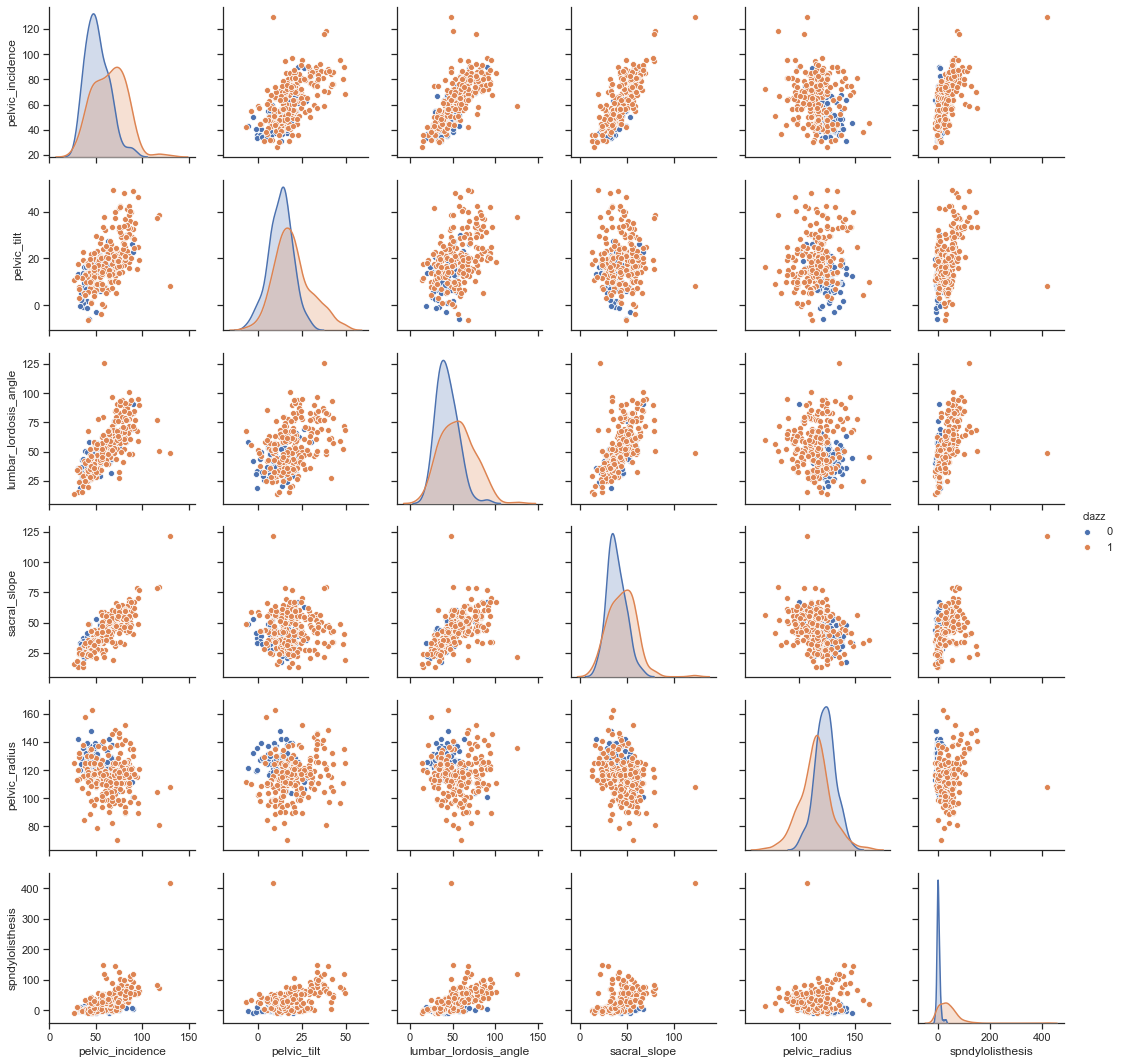

                      boxplot


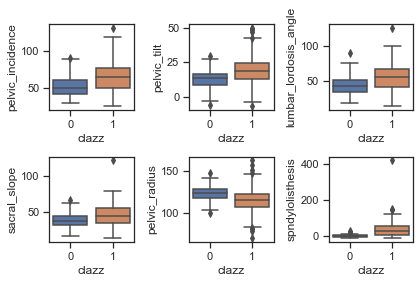

In [15]:
#read file by pandas.read_csv to form DataFrame, and then use .loc to access data
headers=[
    "pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "spndylolisthesis",
    "clazz"
]
df=pd.read_csv('column_2C.dat',sep=' ',header=None, names=headers)  
df.loc[df['clazz'] == 'AB','clazz'] = 1
df.loc[df['clazz'] == 'NO','clazz'] = 0


sns.set(style="ticks", color_codes=True)
#scatterplot by sns.pairplot(realtionship between two variables)
Vars=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'spndylolisthesis']
sns.pairplot(df,vars=Vars,hue='clazz')
print('                                             scatterplot')
plt.show()

#boxplot by sns.boxplot
for i in range(1,7):
    ax = plt.subplot(2,3, i)  
    sns.boxplot(data=df, x='clazz', y=headers[i-1], ax=ax ,orient='v') 
print('                      boxplot')
plt.tight_layout()

In [16]:
#select training data
tr1=df.loc[df['clazz']==1].iloc[:140]
tr2=df.loc[df['clazz']==0].iloc[:70]
training_data=tr1.append(tr2,ignore_index=True)

#select test data
test1=df.loc[df['clazz']==1].iloc[140:]
test2=df.loc[df['clazz']==0].iloc[70:]
test_data=test1.append(test2,ignore_index=True)  #ignore_index=True---index reordering

## Built model

### KNN classify with Edclidean metric

best_k: 4
                 train and test error


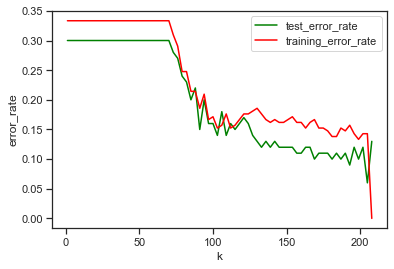

In [18]:
#DataFrme--->array,select X and Y(training data)
training_data_array=np.array(training_data.drop('clazz',axis=1))
training_data_label = np.array(training_data)[:,6]
#DataFrme--->array,select X and Y(test data)
test_data_array=np.array(test_data.drop('clazz',axis=1))
test_data_label = np.array(test_data)[:,6]

# find best k
lst1=[]
lst2=[]
lst3=[]
test_error_rate_list=[]
training_error_rate_list=[]
for k in range(1,209,3):
    lst1.append(k)
    KNN=KNeighborsClassifier(n_neighbors=k)
    fit_model=KNN.fit(training_data_array,training_data_label) 
    
    test_accuracy_rate=KNN.score(test_data_array,test_data_label)
    test_error_rate=1-test_accuracy_rate
    test_error_rate_list.append(test_error_rate)
    lst2.append(test_accuracy_rate)
    
    training_accuracy_rate=KNN.score(training_data_array,training_data_label)
    training_error_rate=1-training_accuracy_rate
    training_error_rate_list.append(training_error_rate)
    lst3.append(training_accuracy_rate)

max_value = max(lst2)
p=lst2.index(max_value)
best_k=lst1[p]
print('best_k:',best_k)

#plot trian and test error in terms of k
k_list=list(range(208,-1,-3))
plt.plot(k_list,test_error_rate_list,label='test_error_rate',color='green')
plt.plot(k_list,training_error_rate_list,label='training_error_rate',color='red')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.legend()
print('                 train and test error')
plt.show()


                    Leaning Curve


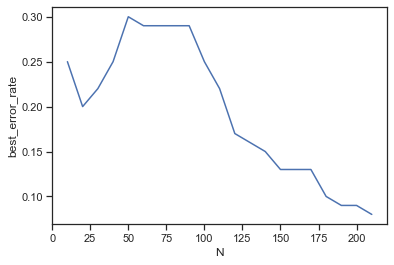

In [19]:
#caculate the k of traning subset
best_error_rate_list=[]
for N in range(10,211,10):
    select_training_set1=training_data.loc[training_data['clazz']==0].iloc[:N//3]
    select_training_set2=training_data.loc[training_data['clazz']==1].iloc[:N-N//3]
    select_training_set=select_training_set1.append(select_training_set2,ignore_index=True) 
    select_training_set_array=np.array(select_training_set.drop('clazz',axis=1))
    select_training_set_label=np.array(select_training_set)[:,6]

    error_rate_list=[]
    for k in range(1,N,5):
        KNN=KNeighborsClassifier(n_neighbors=k)
        fit_model=KNN.fit(select_training_set_array,select_training_set_label)
        error_rate=1-(KNN.score(test_data_array, test_data_label))
        error_rate_list.append(error_rate)
    best_error_rate=min(error_rate_list)
    best_k=range(1,N,5)[error_rate_list.index(best_error_rate)]
    best_error_rate_list.append(best_error_rate)
    
#draw learning curve
N_list=list(range(10,211,10))
plt.plot(N_list,best_error_rate_list)
plt.xlabel('N')
plt.ylabel('best_error_rate')
print('                    Leaning Curve')
plt.show() 


### KNN classify with Manhattan Distance, Chebyshev Distance, Mahalanobis Distance

In [21]:
# Manhattan Distance: find the best k when p=1 and best error rate
error_rate_list=[]
for k in range(1,197,5):
    KNN=KNeighborsClassifier(n_neighbors=k,metric='manhattan',p=1,weights='uniform')
    fit_model=KNN.fit(training_data_array,training_data_label)
    error_rate=1-(KNN.score(test_data_array, test_data_label))
    error_rate_list.append(error_rate)
    
k_range_min = np.arange(1,197,5)
min_rate = min(error_rate_list)
length = len(error_rate_list)
error_min_list =[]
position=[]
for i in range(1,length,1):
    if error_rate_list[i]==min_rate:
        error_min_list.append(error_rate_list[i])
        position.append(k_range_min[i])
best_error_rate=min(error_rate_list)
best_k=range(1,197,5)[error_rate_list.index(best_error_rate)]
print('Manhattan Distance best k is:',(max(position))  )
print('best error rate:',best_error_rate)

#best log10(p)
p_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
p_values=[]
for p in p_list:
    p_values.append(np.power(10,p))

error_rate_list=[]
for p in p_values:
    KNN=KNeighborsClassifier(n_neighbors=best_k,metric='manhattan',p=p,weights='uniform')
    fit_model=KNN.fit(training_data_array,training_data_label)
    error_rate=1-(KNN.score(test_data_array, test_data_label))
    error_rate_list.append(error_rate)

best_p=p_list[error_rate_list.index(min(error_rate_list))]
print('the best log10(p)=',best_p)


# Chebyshev Distance: find the best k when p--∞ and best error rate
error_rate_list=[]
for k in range(1,197,5):
    KNN=KNeighborsClassifier(n_neighbors=k,metric='chebyshev',weights='uniform')
    fit_model=KNN.fit(training_data_array,training_data_label)
    error_rate=1-(KNN.score(test_data_array, test_data_label))
    error_rate_list.append(error_rate)

k_range_min = np.arange(1,197,5)
min_rate = min(error_rate_list)
length = len(error_rate_list)
error_min_list =[]
position=[]
for i in range(1,length,1):
    if error_rate_list[i]==min_rate:
        error_min_list.append(error_rate_list[i])
        position.append(k_range_min[i])
best_error_rate=min(error_rate_list)
best_k=range(1,197,5)[error_rate_list.index(best_error_rate)]
print('Chebyshev Distance best k is:',best_k)
print('best error rate:',best_error_rate)


# Mahalanobis Distance:find the best key and best error rate
error_rate_list=[]
for k in range(1,197,5):
    KNN=KNeighborsClassifier(n_neighbors=k,metric='mahalanobis',weights='uniform',metric_params={"V" : np.cov(training_data_array.transpose())},n_jobs=1,algorithm='brute')
    fit_model=KNN.fit(training_data_array,training_data_label)
    error_rate=1-(KNN.score(test_data_array, test_data_label))
    error_rate_list.append(error_rate)

k_range_min = np.arange(1,197,5)
min_rate = min(error_rate_list)
length = len(error_rate_list)
error_min_list =[]
position=[]
for i in range(1,length,1):
    if error_rate_list[i]==min_rate:
        error_min_list.append(error_rate_list[i])
        position.append(k_range_min[i])
best_error_rate=min(error_rate_list)
best_k=range(1,197,5)[error_rate_list.index(best_error_rate)]
print('Mahalanobis Distance best k is:',best_k)
print('best error rate:',best_error_rate)

Manhattan Distance best k is: 26
best error rate: 0.10999999999999999
the best log10(p)= 0.1
Chebyshev Distance best k is: 16
best error rate: 0.07999999999999996
Mahalanobis Distance best k is: 6
best error rate: 0.16000000000000003


## Model selection

### Compare the test error rate of these distance

In [22]:
#Euclidean Distance the best test error rate (weighted)
error_rate_list=[]
for k in range(1,197,5):
    KNN=KNeighborsClassifier(n_neighbors=k,metric='euclidean',weights='distance')
    fit_model=KNN.fit(training_data_array,training_data_label)
    error_rate=1-(KNN.score(test_data_array, test_data_label))
    error_rate_list.append(error_rate)
best_error_rate=min(error_rate_list)
best_k=range(1,197,5)[error_rate_list.index(best_error_rate)]
print('Euclidean Distance best k is:',best_k)
print('best error rate:',best_error_rate)


#Manhattan Distance the best test error rate (weighted)
error_rate_list=[]
for k in range(1,197,5):
    KNN=KNeighborsClassifier(n_neighbors=k,metric='manhattan',weights='distance')
    fit_model=KNN.fit(training_data_array,training_data_label)
    error_rate=1-(KNN.score(test_data_array, test_data_label))
    error_rate_list.append(error_rate)
best_error_rate=min(error_rate_list)
best_k=range(1,197,5)[error_rate_list.index(best_error_rate)]
print('Manhattan Distance best k is:',best_k)
print('best error rate:',best_error_rate)


#Chebyshev Distance the best test error rate (weighted)
error_rate_list=[]
for k in range(1,197,5):
    KNN=KNeighborsClassifier(n_neighbors=k,metric='chebyshev',weights='distance')
    fit_model=KNN.fit(training_data_array,training_data_label)
    error_rate=1-(KNN.score(test_data_array, test_data_label))
    error_rate_list.append(error_rate)
best_error_rate=min(error_rate_list)
best_k=range(1,197,5)[error_rate_list.index(best_error_rate)]
print('Chebyshev Distance best k is:',best_k)
print('best error rate:',best_error_rate)

Euclidean Distance best k is: 6
best error rate: 0.09999999999999998
Manhattan Distance best k is: 26
best error rate: 0.09999999999999998
Chebyshev Distance best k is: 16
best error rate: 0.10999999999999999


In [23]:
print('the lowest training error rate is:0')

the lowest training error rate is:0
